In [1]:
import matplotlib
%matplotlib inline
import frbpoppy, matplotlib.pyplot as plt, numpy as np
from frbpoppy import *


In [2]:
PLOT = False

PreFRBLE_population = { 'z_max':6., 'W_m':0.307115, 'W_v':0.692885, 'H_0':67.77 }  # 'alpha':logN/logS=?, 'emission_range':[min,max in Hz]=? }

# Generate an FRB population
cosmic_pop = CosmicPopulation(1e5, name='example', **PreFRBLE_population )

# Setup a survey
survey = Survey('chime')

# Observe the FRB population
survey_pop = SurveyPopulation(cosmic_pop, survey, rate_limit=False)


# Check the detection rates
print(survey_pop.rates())

# Plot populations
if PLOT:
    plot(cosmic_pop, survey_pop, frbcat=False) # frbcat='parkes')

cosmic_pop.py | Generating example population
cosmic_pop.py | Finished generating example population
survey_pop.py | Surveying example with chime
rates.py      | chime                      Days       FRBs
rates.py      | ------------------------------------------
rates.py      | In population               1.0     100000
rates.py      | Detected                    1.0      6.224
rates.py      | Too late                    1.0        0.0
rates.py      | Too faint                   1.0    430.108
rates.py      | Outside survey              1.0  99563.668
rates.py      | /Gpc^3                   365.25      0.108
rates.py      | Expected                 0.1607          1
rates.py      | ------------------------------------------
rates.py      | 
do_plot.py    | Plotting populations
do_plot.py    | Press Ctrl+C to quit
 


SystemExit: 

cosmic_pop.py | Generating sfr population
cosmic_pop.py | Finished generating sfr population
survey_pop.py | Surveying sfr with chime
cosmic_pop.py | Generating smd population
cosmic_pop.py | Finished generating smd population
survey_pop.py | Surveying smd with chime
cosmic_pop.py | Generating vol_co population
cosmic_pop.py | Finished generating vol_co population
survey_pop.py | Surveying vol_co with chime


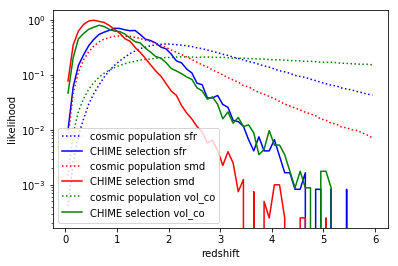

In [19]:
N = 1e6
#Setup a survey
survey = Survey('chime')
for n_model, color in zip( ['sfr','smd','vol_co'], ['blue','red','green']):
    # Generate an FRB population
    cosmic_pop = CosmicPopulation(N, name=n_model, n_model=n_model, **PreFRBLE_population )
    
    # Observe the FRB population
    survey_pop = SurveyPopulation(cosmic_pop, survey, rate_limit=False)
    
    P, x = np.histogram(cosmic_pop.frbs.z, density=True, bins=60, range=[0,6])
    plt.plot( x[:-1]+np.diff(x)/2, P, label='cosmic population '+n_model, linestyle=':', color=color)
    P, x = np.histogram(survey_pop.frbs.z, density=True, bins=60, range=[0,6])
    plt.plot( x[:-1]+np.diff(x)/2, P, label='CHIME selection '+n_model, color=color)
plt.yscale('log')
plt.xlabel('redshift')
plt.ylabel('likelihood')
plt.legend()